In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
credit_df = pd.read_csv("1.credit.csv")

In [3]:
credit_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [4]:
credit_df.shape

(1000, 17)

In [5]:
credit_df.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [6]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for i in credit_df.columns: 
    if credit_df[i].dtype == 'object': 
        credit_df[i] = pd.Categorical(credit_df[i]).codes

In [7]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   checking_balance      1000 non-null   int8 
 1   months_loan_duration  1000 non-null   int64
 2   credit_history        1000 non-null   int8 
 3   purpose               1000 non-null   int8 
 4   amount                1000 non-null   int64
 5   savings_balance       1000 non-null   int8 
 6   employment_duration   1000 non-null   int8 
 7   percent_of_income     1000 non-null   int64
 8   years_at_residence    1000 non-null   int64
 9   age                   1000 non-null   int64
 10  other_credit          1000 non-null   int8 
 11  housing               1000 non-null   int8 
 12  existing_loans_count  1000 non-null   int64
 13  job                   1000 non-null   int8 
 14  dependents            1000 non-null   int64
 15  phone                 1000 non-null   int8 
 16  default

In [8]:
# capture the target column ("default") into separate vectors for training set and test set

X = credit_df.drop("default" , axis=1)

y = credit_df.pop("default")




In [9]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)


In [10]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [11]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()


In [12]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                           Imp
checking_balance      0.144568
months_loan_duration  0.088958
credit_history        0.063875
purpose               0.064790
amount                0.185405
savings_balance       0.070076
employment_duration   0.066423
percent_of_income     0.033578
years_at_residence    0.040068
age                   0.140574
other_credit          0.016319
housing               0.016386
existing_loans_count  0.012179
job                   0.027947
dependents            0.013349
phone                 0.015504


In [13]:
y_predict = dt_model.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error,confusion_matrix,classification_report
rmse_dt=mean_squared_error(y_test,y_predict,squared=False)
rmse_dt

0.5773502691896257

In [16]:
confusion_matrix(y_test,y_predict)

array([[163,  51],
       [ 49,  37]])

In [17]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77       214
           1       0.42      0.43      0.43        86

    accuracy                           0.67       300
   macro avg       0.59      0.60      0.60       300
weighted avg       0.67      0.67      0.67       300



In [20]:
print('Train score',dt_model.score(X_train,y_train))
print('Test score',dt_model.score(X_test,y_test))

Train score 1.0
Test score 0.6666666666666666


#                                      Regularising the Decision Tree

In [22]:

reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [24]:
from sklearn import tree

In [26]:
credit_tree_regularized = open('credit_tree.dot','w')
train_char_label=['No','Yes']
dot_data = tree.export_graphviz(reg_dt_model, out_file= credit_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

credit_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                           Imp
checking_balance      0.144568
months_loan_duration  0.088958
credit_history        0.063875
purpose               0.064790
amount                0.185405
savings_balance       0.070076
employment_duration   0.066423
percent_of_income     0.033578
years_at_residence    0.040068
age                   0.140574
other_credit          0.016319
housing               0.016386
existing_loans_count  0.012179
job                   0.027947
dependents            0.013349
phone                 0.015504


In [27]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [28]:
import matplotlib.pyplot as plt

AUC: 0.851


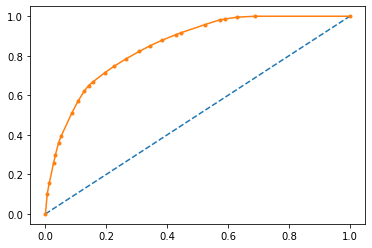

In [29]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

auc_test 0.7258204738100413


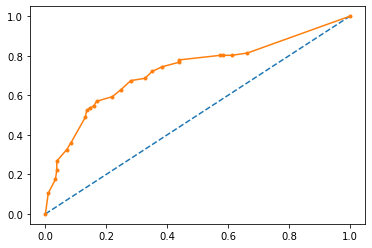

In [31]:
probs=reg_dt_model.predict_proba(X_test)
probs=probs[:,1]
auc=roc_auc_score(y_test,probs)
print('auc_test',auc)
fpr,tpr,threshold=roc_curve(y_test,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

In [ ]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       486
           1       0.68      0.62      0.65       214

    accuracy                           0.80       700
   macro avg       0.76      0.75      0.75       700
weighted avg       0.79      0.80      0.79       700



In [34]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       214
           1       0.60      0.53      0.56        86

    accuracy                           0.76       300
   macro avg       0.71      0.70      0.70       300
weighted avg       0.76      0.76      0.76       300



In [35]:
confusion_matrix(y_train, ytrain_predict)

array([[424,  62],
       [ 81, 133]])

In [36]:
confusion_matrix(y_test, ytest_predict)

array([[183,  31],
       [ 40,  46]])

In [37]:
reg_dt_model.score(X_train,y_train)

0.7957142857142857

In [38]:
reg_dt_model.score(X_test,y_test)

0.7633333333333333